# How Does LLamaParse Premium Perform in Financial Analysis ?

▶ ➡ Previously, I shared insights on LlamaParse from LlamaIndex with GPT-4o mode, showcasing how GPT-4o multimodal enhances data extraction, especially with charts. We saw firsthand how effective this mode is for visual content, particularly for financial documents which are rich in visual data.



You can also leverage other multimodal LLMs by setting use_vendor_multimodal_model=True, along with the model name and your API key (Anthropic, for example).


▶  ➡  Now you can use Premium mode of LlamaParse. What is it?

LlamaParse Premium Mode combines the strengths of both fast/accurate text and table parsing, which are good on parsing long text and tables but not good for visual content, with advanced multimodal capabilities for visual content, which are good for visual content but not as good for text/tables.

"By using state-of-the-art multimodal models and heuristic text parsing techniques, it excels at extracting information from complex documents. This results in higher accuracy and reduced hallucination, making it ideal for building context-augmented RAG/agent applications."


▶  ➡  Process:


-  I loaded a financial statement document (PDF), using LlamaParse with premium mode and compare its performance to the non-premium mode while still leveraging a multimodal LLM.


-  I follow the same logic for a historical price chart of BTCUSD as an image.


-  I use GPT-4o for Q&A task based on the extracted information.


▶  ➡  Key Takeways:
-  Financial statement PDF: Overall, from these few examples, the parsing with LlamaParse Premium was better than the multimodal alone which helps extracting data from charts and thus enhancing the RAG system answers, especially from Page 2 (the first chart).

*One can conduct more in-depth evaluation using tools like Giskard AI to determine which version (LlamaPars premium vs non premium, with or without multimodal) performs better.*

-  Chart Historical Prices: Even if the whole chart of prices was not extracted, the parser detected the whole data available on the image, leading to very accurate numbers extraction and also accurate final answers, when using GPT-4o for chatting. It was less the case without the premium version but with the multimodal LLM


This underscores the critical role of a robust parser in enhancing the effectiveness of your RAG system.




# Install and API Keys

In [ ]:
!pip install llama-index llama-index-core llama-parse openai -q
!pip install llama-index-llms-anthropic -q

In [2]:
import nest_asyncio
nest_asyncio.apply()

from google.colab import userdata
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')
LLAMAPARSE_API_KEY = userdata.get('LLAMACLOUD_API_KEY')
ANTHROPIC_API_KEY = userdata.get("CLAUDE_API_KEY")

# Statement Analysis Financial Pdf

## Set up LlamaParse with Premium Mode to True

In [4]:
from llama_parse import LlamaParse

# set up LlamaParse parser: ==> premium_mode=True
parser_premium = LlamaParse(api_key=LLAMAPARSE_API_KEY, result_type="markdown", premium_mode=True)

In [ ]:
# # parser_premium
# LlamaParse(is_remote=False, api_key='llx-xxxxxxxxx', base_url='https://api.cloud.llamaindex.ai',
#            result_type=<ResultType.MD: 'markdown'>, num_workers=4, check_interval=1, max_timeout=2000, verbose=True,
#            show_progress=True, language=<Language.ENGLISH: 'en'>, parsing_instruction='', skip_diagonal_text=False,
#            invalidate_cache=False, do_not_cache=False, fast_mode=False, premium_mode=True, do_not_unroll_columns=False,
#            page_separator=None, page_prefix=None, page_suffix=None, gpt4o_mode=False, gpt4o_api_key=None,
#            bounding_box=None, target_pages=None, ignore_errors=True, split_by_page=True, vendor_multimodal_api_key=None,
#            use_vendor_multimodal_model=False, vendor_multimodal_model_name=None, take_screenshot=False, custom_client=None)

### Parsing the document

In [26]:
path_file=local_path+'jpmorgan_annualreport-2022-splitted.pdf' #local path
documents = parser_premium.load_data(path_file)

Started parsing the file under job_id 42c24be1-0602-44bd-9b9b-76fb3a3efa9f


In [27]:
len(documents)

2

In [ ]:
print(documents[0].text)

# Earnings, Diluted Earnings per Share and Return on Tangible Common Equity 2004-2022

($ in billions, except per share and ratio data)

| | Reported | | | Excluding reserve release/build¹ | | |
|---|---|---|---|---|---|---|
| | 2020 | 2021 | 2022 | 2020 | 2021 | 2022 |
| Net income ($B) | $29.1 | $48.3 | $37.7 | $38.4 | $39.1 | $40.4 |
| Diluted EPS ($) | $8.88 | $15.36 | $12.09 | $11.87 | $12.35 | $12.99 |
| ROTCE | 14.4% | 23.0% | 17.7% | 19.3% | 18.5% | 19.1% |

```mermaid
graph TD
    A[Net income excluding reserve release/build] --> B[$48.3]
    C[$38.4] --> B
    D[$39.1] --> B
    E[$37.7] --> B
    F[Adjusted net income²] --> G[$32.5]
    H[$36.4] --> G
    I[$26.9] --> G
    J[$10.72] --> G
    K[$29.1] --> G
    L[$15.36] --> G
    M[$12.09] --> G
    N[$9.00] --> G
```

| Year | Net Income | Diluted earnings per share (EPS) | Return on tangible common equity (ROTCE) |
|------|------------|----------------------------------|------------------------------------------|
| 2004 

Here is the image again so you can compare:🔽 ⬇

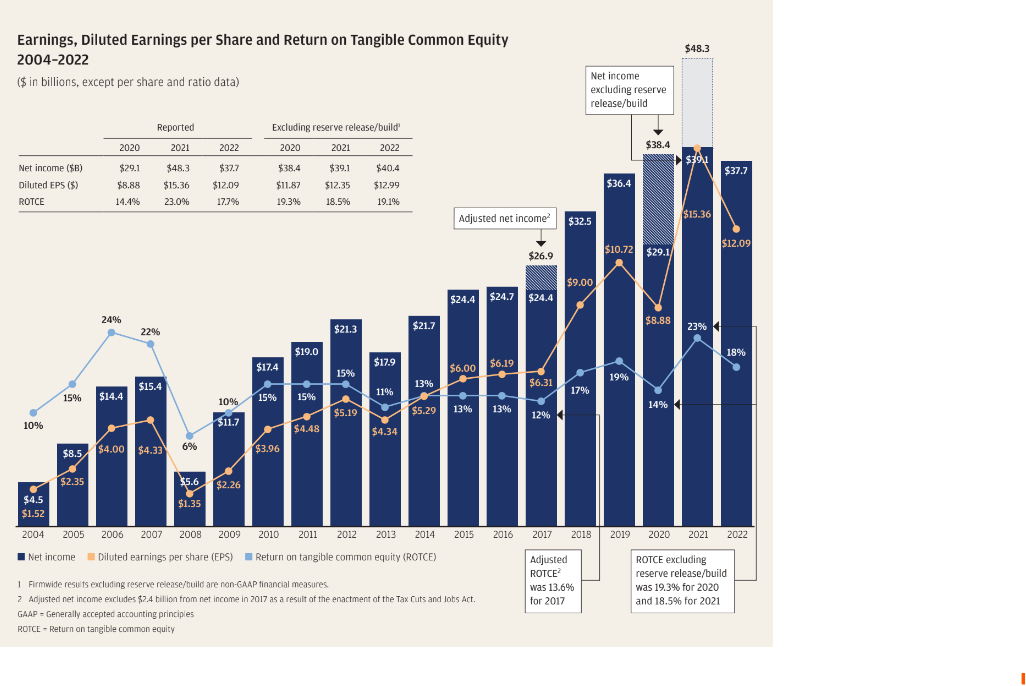

In [ ]:
path_img = f"{path_img}/page_1_table_chart.png"

from IPython.display import Image
Image(path_img)

🔽 ⬇ In the second page, we can see the chart extracted with the premium mode. However some figures seems to not be aligned with the years. 🔽 ⬇

In [29]:
print(documents[1].text)

# Tangible Book Value¹ and Average Stock Price per Share
## 2004-2022

```
$155.61
                                                                $110.72    $113.80
                                                                                    $106.52        $128.13

                                                                                            High: $169.81
                                                       $92.01                               Low:  $101.28

                                        $63.83 $65.62
                               $58.17                                                $71.53 $73.12
                      $51.88                                             $66.11
$47.75                                                           $60.98
$43.93                                               $53.56 $56.33
$38.70 $36.07        $39.83   $40.36 $39.36 $39.22   $48.13 $51.44
              $35.49                         $44.60
                      

🔽 ⬇ Here is the image again so you can compare:🔽 ⬇

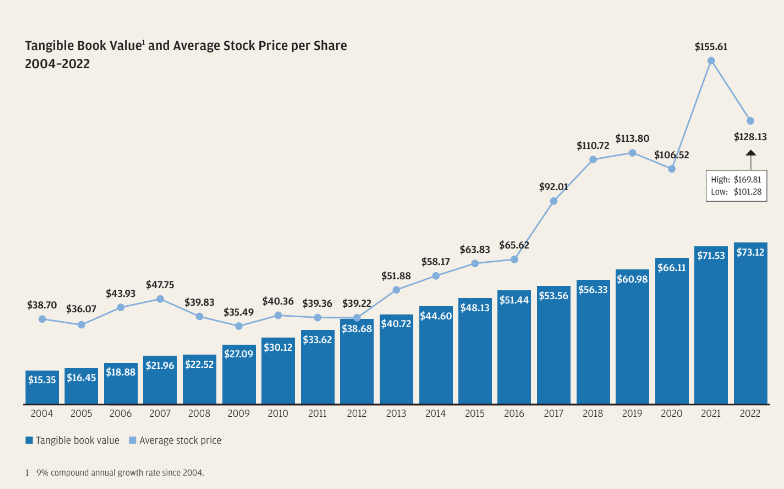

In [49]:
path_img = f"{path_img}/page_2_chart.png"

from IPython.display import Image
Image(path_img)

🔽 ⬇ If you want to use SimpleDirectoryReader instead: 🔽 ⬇

In [ ]:
# from llama_index.core import SimpleDirectoryReader

# # use SimpleDirectoryReader to parse our file
# pdf_file = local_path + 'jpmorgan_annualreport-2022-splitted.pdf'
# file_extractor = {".pdf": parser}
# documents = SimpleDirectoryReader(input_files=[path_file], file_extractor=file_extractor).load_data()

Started parsing the file under job_id dad62013-a9db-42c6-9409-b9496ee7726f
...

In [ ]:
# With SimpleDirectoryReader
print(documents[0].text)

# Earnings, Diluted Earnings per Share and Return on Tangible Common Equity 2004-2022

($ in billions, except per share and ratio data)

| | Reported | | | Excluding reserve release/build¹ | | |
|---|---|---|---|---|---|---|
| | 2020 | 2021 | 2022 | 2020 | 2021 | 2022 |
| Net income ($B) | $29.1 | $48.3 | $37.7 | $38.4 | $39.1 | $40.4 |
| Diluted EPS ($) | $8.88 | $15.36 | $12.09 | $11.87 | $12.35 | $12.99 |
| ROTCE | 14.4% | 23.0% | 17.7% | 19.3% | 18.5% | 19.1% |

```mermaid
graph TD
    A[Net income excluding reserve release/build] --> B[$48.3]
    C[$38.4] --> B
    D[$39.1] --> B
    E[$37.7] --> B
    F[Adjusted net income²] --> G[$32.5]
    H[$36.4] --> G
    I[$26.9] --> G
    J[$10.72] --> G
    K[$29.1] --> G
    L[$15.36] --> G
    M[$12.09] --> G
    N[$9.00] --> G
```

| Year | Net Income | Diluted earnings per share (EPS) | Return on tangible common equity (ROTCE) |
|------|------------|----------------------------------|------------------------------------------|
| 2004 

### Chatting with the extracted data:

🔽 ⬇ When chating, the LLM gives accurate results/numbers based on the extracted information from the parser: 🔽 ⬇

In [33]:
from llama_index.core import VectorStoreIndex
from llama_index.llms.openai import OpenAI
import os

os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY #To use embedding from OpenAI
llm_gpt4o = OpenAI(model="gpt-4o", api_key = OPENAI_API_KEY)

index_premium = VectorStoreIndex.from_documents(documents)
query_engine_gpt4o_premium = index_premium.as_query_engine(similarity_top_k=3, llm=llm_gpt4o)

Page 1:

In [34]:
response = query_engine_gpt4o_premium.query("What was the ROTCE in 2014?")
print(response)

The Return on Tangible Common Equity (ROTCE) in 2014 was 13%.


In [35]:
response2 = query_engine_gpt4o_premium.query("What was the ROTCE and EPS in 2014?")
print(response2)

In 2014, the Return on Tangible Common Equity (ROTCE) was 13%, and the Diluted Earnings per Share (EPS) was $5.29.


In [36]:
response3 = query_engine_gpt4o_premium.query("What key takeaways to learn from the graph in the first page?")
print(response3)

The graph on the first page highlights the differences in net income, diluted earnings per share (EPS), and return on tangible common equity (ROTCE) when excluding reserve release/build adjustments. It shows that excluding these adjustments, the financial metrics present a more stable and consistent performance over the years 2020 to 2022. This suggests that the reserve release/build adjustments can significantly impact reported earnings, potentially obscuring the underlying financial health and performance of the company. The graph emphasizes the importance of considering both reported and adjusted figures to gain a comprehensive understanding of the company's financial results.


Page 2:

In [38]:
response4 = query_engine_gpt4o_premium.query("What was the average stock price on 2006?")
print(response4)
#Not a good answer!! $43.93

The average stock price in 2006 was $39.36.


In [39]:
response5 = query_engine_gpt4o_premium.query("What was the average stock price in 2012 and 2022?")
print(response5)
# ==> Correct answers

The average stock price in 2012 was $39.22, and in 2022 it was $128.13.


## Set Up LlamaParse without the Premium Mode but with the multimodal mode

In [30]:
from llama_parse import LlamaParse
import nest_asyncio;
nest_asyncio.apply()

parser2 = LlamaParse(api_key=LLAMAPARSE_API_KEY, result_type="markdown", premium_mode=False, use_vendor_multimodal_model=True,
                    vendor_multimodal_model_name="anthropic-sonnet-3.5",
                    vendor_multimodal_api_key=ANTHROPIC_API_KEY
)

## parser2
# LlamaParse(is_remote=False, api_key='llx-xxxx', base_url='https://api.cloud.llamaindex.ai',
#            result_type=<ResultType.MD: 'markdown'>, num_workers=4, check_interval=1, max_timeout=2000,
#            verbose=True, show_progress=True, language=<Language.ENGLISH: 'en'>, parsing_instruction='',
#            skip_diagonal_text=False, invalidate_cache=False, do_not_cache=False, fast_mode=False, premium_mode=False,
#            do_not_unroll_columns=False, page_separator=None, page_prefix=None, page_suffix=None, gpt4o_mode=False,
#            gpt4o_api_key=None, bounding_box=None, target_pages=None, ignore_errors=True, split_by_page=True,
#            vendor_multimodal_api_key='sk-xxx', use_vendor_multimodal_model=True,
#            vendor_multimodal_model_name='anthropic-sonnet-3.5', take_screenshot=False, custom_client=None)

In [31]:
path_file=local_path+'jpmorgan_annualreport-2022-splitted.pdf' #local path
documents2 = parser2.load_data(path_file)

Started parsing the file under job_id b4e5856d-e095-4b48-894b-3b0617a360c0


We extract the same information as the premium version, except the mermaid graph. This shows that we have already reached good results with the multimodal LLM, without the premium version. Note that we still need to use a powerfull LLM to perform such high accurate results..

In [40]:
print(documents2[0].text)

# Earnings, Diluted Earnings per Share and Return on Tangible Common Equity 2004-2022
($ in billions, except per share and ratio data)

| Reported |  |  | Excluding reserve release/build¹ |  |  |
|----------|----------|----------|----------|----------|----------|
| 2020 | 2021 | 2022 | 2020 | 2021 | 2022 |
| Net Income ($B) | $39.1 | $48.3 | $32.7 | $38.4 | $39.1 | $40.4 |
| Diluted EPS ($) | $8.88 | $15.36 | $12.09 | $11.87 | $12.35 | $12.99 |
| ROTCE | 14.4% | 23.0% | 12.7% | 19.3% | 18.5% | 19.1% |

[Chart showing Net Income, Diluted earnings per share (EPS), and Return on tangible common equity (ROTCE) from 2004 to 2022]

Net Income² | Diluted earnings per share (EPS) | Return on tangible common equity (ROTCE)
------------|----------------------------------|--------------------------------------------
2004: $4.5  | $1.52                            | 10%
2005: $8.5  | $2.35                            | 15%
2006: $14.0 | $4.00                            | 24%
2007: $15.4 | $4.33     

In [ ]:
print(documents2[0].text)

# Earnings, Diluted Earnings per Share and Return on Tangible Common Equity 2004-2022
($ in billions, except per share and ratio data)

| Reported |  |  | Excluding reserve release/build¹ |  |  |
|----------|----------|----------|----------|----------|----------|
| 2020 | 2021 | 2022 | 2020 | 2021 | 2022 |
| Net Income ($B) | $39.1 | $48.3 | $32.7 | $38.4 | $39.1 | $40.4 |
| Diluted EPS ($) | $8.88 | $15.36 | $12.09 | $11.87 | $12.35 | $12.99 |
| ROTCE | 14.4% | 23.0% | 12.7% | 19.3% | 18.5% | 19.1% |

[Chart showing Net Income, Diluted earnings per share (EPS), and Return on tangible common equity (ROTCE) from 2004 to 2022]

Net Income² | Diluted earnings per share (EPS) | Return on tangible common equity (ROTCE)
------------|----------------------------------|--------------------------------------------
2004: $4.5  | $1.52                            | 10%
2005: $8.5  | $2.35                            | 15%
2006: $14.0 | $4.00                            | 24%
2007: $15.4 | $4.33     

In [41]:
print(documents2[1].text)

# Tangible Book Value¹ and Average Stock Price per Share 2004-2022

[Chart showing the trend of Tangible book value and Average stock price from 2004 to 2022]

¹ 9% compound annual growth rate since 2004.

## Stock total return analysis

| | Bank One | S&P 500 Index | S&P Financials Index |
|---|---|---|---|
| Performance since becoming CEO of Bank One (3/27/2000–12/31/2022)¹ | | | |
| Compounded annual gain | 11.3% | 6.1% | 4.6% |
| Overall gain | 1,047.8% | 287.7% | 176.1% |

| | JPMorgan Chase & Co. | S&P 500 Index | S&P Financials Index |
|---|---|---|---|
| Performance since the Bank One and JPMorgan Chase & Co. merger (7/1/2004–12/31/2022) | | | |
| Compounded annual gain | 9.9% | 8.9% | 4.4% |
| Overall gain | 471.6% | 386.8% | 120.0% |

| Performance for the period ended December 31, 2022 | | | |
| Compounded annual gain/(loss) | | | |
| One year | (12.6)% | (18.1)% | (10.5)% |
| Five years | 7.7% | 9.4% | 6.4% |
| Ten years | 14.9% | 12.6% | 12.1% |

This chart shows actual re

### Chatting

In [ ]:
# from llama_index.core import VectorStoreIndex
# from llama_index.llms.openai import OpenAI
# import os

# os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY #To use embedding from OpenAI
llm_gpt4o = OpenAI(model="gpt-4o", api_key = OPENAI_API_KEY)

index2 = VectorStoreIndex.from_documents(documents2)
query_engine_gpt4o_2 = index2.as_query_engine(similarity_top_k=3, llm=llm_gpt4o)

Page 1

In [42]:

response2 = query_engine_gpt4o_2.query("What was the ROTCE in 2014?")
print(response2)

The ROTCE in 2014 was 13%.


In [ ]:
response2 = query_engine_gpt4o_2.query("What was the ROTCE and EPS in 2014?")
print(response2)

In 2014, the Return on Tangible Common Equity (ROTCE) was 13%, and the Diluted Earnings Per Share (EPS) was $5.29.


In [ ]:
response3 = query_engine_gpt4o_2.query("What key takeaways to learn from the graph in the first page?")
print(response3)

The key takeaways from the graph on the first page include the consistent growth in tangible book value, which has achieved a 9% compound annual growth rate since 2004. Additionally, the average stock price per share has shown a positive trend over the years, reflecting the company's strong financial performance and market confidence. This growth indicates effective management and strategic decisions that have contributed to the company's long-term value creation.


Page 2

The RAG system, in this second page, was not able to retrieve the data from the first, thus leads to very poor answers.

In [43]:
response = query_engine_gpt4o_2.query("What was the average stock price on 2006?")
print(response)

The average stock price for 2006 is not provided in the given information.


In [44]:
response = query_engine_gpt4o_2.query("What was the average stock price in 2012 and 2022?")
print(response)

The average stock price in 2012 and 2022 is not provided in the available information.


# TakeAways

▶ Overall, from these few examples, the parsing with LlamaParse Premium was way better than the multimodal alone which helps extracting data from charts and thus enhancing the RAG system answers.

▶ One can conduct more in-depth evaluation using tools like Giskard AI to determine which version (LlamaPars premium vs non premium, with or without multimodal) performs better.

# Chart HistoricaL PRICES

Here is the image we want to parse: BTCUSD Historical prices:

### Image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


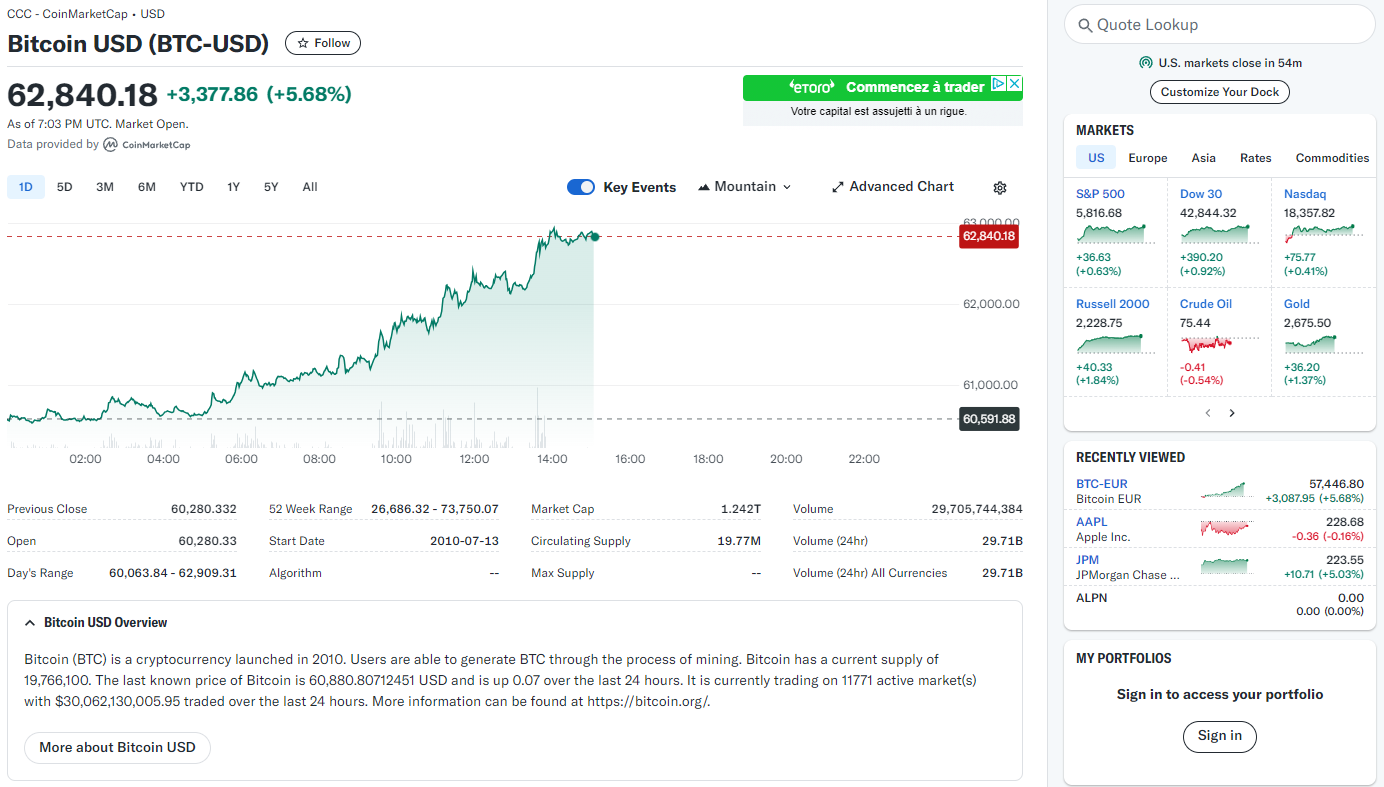

In [5]:
path_img = f"{path_img}/btcusd_data.png"

from IPython.display import Image
Image(path_img)

## Premium Parser

In [5]:
from llama_parse import LlamaParse

# set up LlamaParse parser: ==> premium_mode=True
parser_premium = LlamaParse(api_key=LLAMAPARSE_API_KEY, result_type="markdown", premium_mode=True)

### Parsing

In [6]:
documents = parser_premium.load_data(path_img)

Started parsing the file under job_id 33be7a1d-cda1-4140-87e4-b60e2cc2fc14
.

In [7]:
len(documents)

1

In [8]:
print(documents[0].text)

# Bitcoin USD (BTC-USD) ⭐ Follow

62,840.18 +3,377.86 (+5.68%)

As of 7:03 PM UTC. Market Open.
Data provided by CoinMarketCap

1D 5D 3M 6M YTD 1Y 5Y All | Key Events ▲ Mountain ▼ | 📈 Advanced Chart ⚙️

[Chart showing Bitcoin price movement over the day, with a significant upward trend]

| Previous Close | 60,280.332 | 52 Week Range | 26,686.32 - 73,750.07 | Market Cap | 1.242T | Volume | 29,705,744,384 |
|----------------|------------|----------------|------------------------|------------|--------|--------|-----------------|
| Open | 60,280.33 | Start Date | 2010-07-13 | Circulating Supply | 19.77M | Volume (24hr) | 29.71B |
| Day's Range | 60,063.84 - 62,909.31 | Algorithm | -- | Max Supply | -- | Volume (24hr) All Currencies | 29.71B |

## Bitcoin USD Overview

Bitcoin (BTC) is a cryptocurrency launched in 2010. Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 19,766,100. The last known price of Bitcoin is 60,880.80712451 USD and is up 0.

### Chatting

In [9]:
from llama_index.core import VectorStoreIndex
from llama_index.llms.openai import OpenAI
import os

os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY #To use embedding from OpenAI
llm_gpt4o = OpenAI(model="gpt-4o", api_key = OPENAI_API_KEY)

index = VectorStoreIndex.from_documents(documents)
query_engine_gpt4o = index.as_query_engine(similarity_top_k=3, llm=llm_gpt4o)
response = query_engine_gpt4o.query("What is the maximum number shown in the graph")
print(response)

The maximum number shown in the graph is 62,909.31.


In [10]:
response = query_engine_gpt4o.query("What is the current price shown in the chart")
print(response)

The current price shown in the chart for Bitcoin USD is 62,840.18.


In [11]:
response = query_engine_gpt4o.query("What is the frequency of the chart")
print(response)

The chart shows Bitcoin price movement over the day.


## Without Premium Parser + Multimodal

In [ ]:
from llama_parse import LlamaParse
import nest_asyncio;
nest_asyncio.apply()

parser2 = LlamaParse(api_key=LLAMAPARSE_API_KEY, result_type="markdown", premium_mode=False, use_vendor_multimodal_model=True,
                    vendor_multimodal_model_name="anthropic-sonnet-3.5",
                    vendor_multimodal_api_key=ANTHROPIC_API_KEY
)

### Parsing

In [19]:
documents2 = parser2.load_data(path_img)
len(documents2)

Started parsing the file under job_id 82ad6d24-c785-471a-887a-6e5dca243122


1

In [21]:
print(documents2[0].text)

# Bitcoin USD (BTC-USD)

62,840.18 +3,377.86 (+5.68%)
As of 7:03 PM UTC. Market Open.
Data provided by CoinMarketCap

[Chart showing Bitcoin price over time]

| Previous Close | 60,280.332 | 52 Week Range | 26,686.32 - 73,750.07 | Market Cap | 1.242T | Volume | 29,705,744,384 |
|----------------|------------|----------------|------------------------|------------|--------|--------|-------------------|
| Open | 60,280.33 | Start Date | 2010-07-13 | Circulating Supply | 19.77M | Volume (24hr) | 29.71B |
| Day's Range | 60,063.84 - 62,909.31 | Algorithm | -- | Max Supply | -- | Volume (24hr) All Currencies | 29.71B |

## Bitcoin USD Overview

Bitcoin (BTC) is a cryptocurrency launched in 2010. Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 19,766,100. The last known price of Bitcoin is 60,880.80712451 USD and is up 0.07 over the last 24 hours. It is currently trading on 11771 active market(s) with $30,062,130,005.95 traded over the last 24 hou

### Chatting

In [22]:
# from llama_index.core import VectorStoreIndex
# from llama_index.llms.openai import OpenAI
# import os

os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY #To use embedding from OpenAI
llm_gpt4o = OpenAI(model="gpt-4o", api_key = OPENAI_API_KEY)

index2 = VectorStoreIndex.from_documents(documents2)
query_engine_gpt4o_2 = index2.as_query_engine(similarity_top_k=3, llm=llm_gpt4o)


In [23]:
response = query_engine_gpt4o_2.query("What is the maximum number shown in the graph")
print(response)
# ==> this is not the answer I was Looking for: the maximum in the graph, meaning 1D maximum value. Yet, it gives 52-week highest.

The maximum number shown in the graph is 73,750.07, which represents the highest value in the 52-week range for Bitcoin USD.


In [24]:
response = query_engine_gpt4o_2.query("What is the current price shown in the chart")
print(response)
# ==> OK

The current price shown in the chart for Bitcoin USD is 62,840.18.


In [25]:
response = query_engine_gpt4o_2.query("What is the frequency of the chart")
print(response)
# ==> It didn't succedd to extract the right info (1D) from the chart

The frequency of the chart is not specified in the provided information.


# Key Takeaways

▶ Even if the whole chart of prices was not extracted, the parser detected the whole data available on the image, leading to very accurate numbers extraction and also accurate final answers, when using GPT-4o for chatting. It was less the case without the premium version but with the multimodal LLM


▶ This underscores the critical role of a robust parser in enhancing the effectiveness of your RAG system.